# Plotting graphs

### Setup

In [1]:
using LightGraphs

# We will looks at this package
using GraphPlot

# Helper packges
using Colors, Random

## Options for plotting

Lets create a graph:

In [2]:
g = smallgraph(:petersen)

{10, 15} undirected simple Int64 graph

Not very informative, lets use `gplot` (in terminal `gplothtml`) from `GrapPlot.jl`

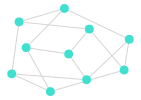

In [3]:
gplot(g)

Repeat a view times, will look different every time

Lets look what options we have:

In [4]:
?gplot

search: gplot gplothtml GraphPlot



Given a graph and two vectors of X and Y coordinates, returns a Compose tree of the graph layout

**Arguments**

`G` Graph to draw

`layout` Optional. Layout algorithm. Currently can be one of [random*layout, circular*layout, spring*layout, shell*layout, stressmajorize*layout, spectral*layout]. Default: `spring_layout`

`locs_x, locs_y` Locations of the nodes. Can be any units you want, but will be normalized and centered anyway

`NODESIZE` Optional. Max size for the nodes. Default: `3.0/sqrt(N)`

`nodesize` Optional. Relative size for the nodes, can be a Vector. Default: `1.0`

`nodelabel` Optional. Labels for the vertices, a Vector or nothing. Default: `nothing`

`nodelabelc` Optional. Color for the node labels, can be a Vector. Default: `colorant"black"`

`nodelabeldist` Optional. Distances for the node labels from center of nodes. Default: `0.0`

`nodelabelangleoffset` Optional. Angle offset for the node labels. Default: `π/4.0`

`NODELABELSIZE` Optional. Largest fontsize for the vertice labels. Default: `4.0`

`nodelabelsize` Optional. Relative fontsize for the vertice labels, can be a Vector. Default: `1.0`

`nodefillc` Optional. Color to fill the nodes with, can be a Vector. Default: `colorant"turquoise"`

`nodestrokec` Optional. Color for the nodes stroke, can be a Vector. Default: `nothing`

`nodestrokelw` Optional. Line width for the nodes stroke, can be a Vector. Default: `0.0`

`edgelabel` Optional. Labels for the edges, a Vector or nothing. Default: `[]`

`edgelabelc` Optional. Color for the edge labels, can be a Vector. Default: `colorant"black"`

`edgelabeldistx, edgelabeldisty` Optional. Distance for the edge label from center of edge. Default: `0.0`

`EDGELABELSIZE` Optional. Largest fontsize for the edge labels. Default: `4.0`

`edgelabelsize` Optional. Relative fontsize for the edge labels, can be a Vector. Default: `1.0`

`EDGELINEWIDTH` Optional. Max line width for the edges. Default: `0.25/sqrt(N)`

`edgelinewidth` Optional. Relative line width for the edges, can be a Vector. Default: `1.0`

`edgestrokec` Optional. Color for the edge strokes, can be a Vector. Default: `colorant"lightgray"`

`arrowlengthfrac` Optional. Fraction of line length to use for arrows. Equal to 0 for undirected graphs. Default: `0.1` for the directed graphs

`arrowangleoffset` Optional. Angular width in radians for the arrows. Default: `π/9 (20 degrees)`


<br>
<br>
<br>

In [5]:
# Add a label to each node:

vertices(g) |> collect

10-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

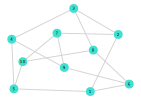

In [6]:
gplot(g, nodelabel = vertices(g))

In [32]:
# Add a label to each edge

edges(g) |> collect

86-element Array{LightGraphs.SimpleGraphs.SimpleEdge{Int64},1}:
 Edge 1 => 2
 Edge 1 => 5
 Edge 1 => 6
 Edge 1 => 7
 Edge 1 => 10
 Edge 1 => 12
 Edge 1 => 14
 Edge 1 => 16
 Edge 1 => 17
 Edge 1 => 19
 Edge 1 => 20
 Edge 2 => 4
 Edge 2 => 5
 ⋮
 Edge 13 => 15
 Edge 13 => 16
 Edge 14 => 15
 Edge 14 => 16
 Edge 14 => 17
 Edge 14 => 18
 Edge 15 => 18
 Edge 15 => 19
 Edge 16 => 18
 Edge 16 => 19
 Edge 16 => 20
 Edge 18 => 19

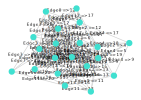

In [33]:
gplot(g, edgelabel = edges(g))

#### Colors

We use the package Colors.jl

In [9]:
using Colors

cr = colorant"red"

In [10]:
cs = [colorant"lightblue", colorant"yellow"]

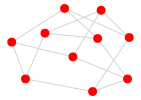

In [11]:
gplot(g, nodefillc=cr)

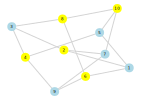

In [12]:
gplot(g, nodefillc = map(i -> cs[mod1(i, 2)], vertices(g)), nodelabel=vertices(g))

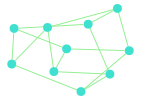

In [13]:
gplot(g, edgestrokec = colorant"lightgreen")

### Exercise: Clustering Zachary's karate club

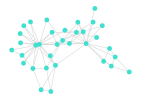

In [14]:
karate = smallgraph(:karate)

gplot(karate)

- Vertices are members of a karate club
- Conflict inside of club between an administrator and an instructor
- Edges represent interactions outside of the club
- Clustering algorithm can assign each member to a clusters

=> Use the `label_propagation` algorithm to find the clusters

**Hint 1:** `label_propagation` is a randomized algorithm and does not produce the same number of clusters

**Hint 2:** One can use the `distinguishable_colors` function to produce a palette of colors:

In [15]:
palette = distinguishable_colors(10)

Solution below

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


In [16]:
?label_propagation

search: label_propagation



```
label_propagation(g, maxiter=1000)
```

Community detection using the label propagation algorithm. Return two vectors: the first is the label number assigned to each node, and the second is the convergence history for each node. Will return after `maxiter` iterations if convergence has not completed.

### References

  * [Raghavan et al.](http://arxiv.org/abs/0709.2938)


In [45]:
label_propagation(barbell_graph(4, 5))

([1, 1, 1, 1, 2, 2, 2, 2, 2], [9, 8, 3])

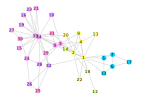

In [17]:
karate = smallgraph(:karate)

# calculate the clustes
labels, _ = label_propagation(karate)

# map cluster labels to colors
palette = distinguishable_colors(nv(karate) + 1)
colors = map(l -> palette[l + 1], labels)

gplot(karate, nodefillc = colors, nodelabel = vertices(karate))

## Layouts

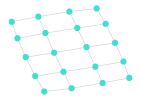

In [18]:
g = grid((4, 5))
gplot(g)

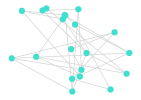

In [19]:
gplot(g, layout = random_layout)

In [20]:
# A layout is just a function from a graph g to a vector of xs a vector of ys
random_layout(g) |> typeof |> println
println()
random_layout(g) |> println

Tuple{Array{Float64,1},Array{Float64,1}}

([0.39637251535200413, 0.7302666135960456, 0.7315800218871722, 0.7958687142935457, 0.37871942066781394, 0.5959533966360471, 0.44581053859191466, 0.9728382393022066, 0.8315558669469634, 0.11574889375995889, 0.9161052901600073, 0.288463314269912, 0.9106634287368987, 0.5823408011017814, 0.09261719103710542, 0.9486603010503414, 0.35233916062210513, 0.997227341642833, 0.24707104802541147, 0.8775488080509664], [0.6170669846600241, 0.996255076824059, 0.2840813828400346, 0.26281753925817264, 0.7938419879101004, 0.4992407664232661, 0.3994352238006693, 0.032882142087305555, 0.4815520124925754, 0.0014880426599099827, 0.9867682235995106, 0.9778568254025541, 0.9190778497426497, 0.9328330079492986, 0.5830148979283654, 0.1281786513834482, 0.8750295455268833, 0.6653157966630918, 0.5946301386077466, 0.4286130598201352])


### Spring Layout

- Inspired from physics
- Model graph as nodes with springs in them 
- Iteratively simulate

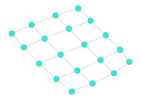

In [21]:
gplot(g, layout = spring_layout)

In [22]:
?spring_layout

search: spring_layout



This function is copy from [IainNZ](https://github.com/IainNZ)'s [GraphLayout.jl](https://github.com/IainNZ/GraphLayout.jl)

Use the spring/repulsion model of Fruchterman and Reingold (1991):

  * Attractive force:  f_a(d) =  d^2 / k
  * Repulsive force:  f_r(d) = -k^2 / d

where d is distance between two vertices and the optimal distance between vertices k is defined as C * sqrt( area / num_vertices ) where C is a parameter we can adjust

**Parameters**

*G* a graph

*C* Constant to fiddle with density of resulting layout

*MAXITER* Number of iterations we apply the forces

*INITTEMP* Initial "temperature", controls movement per iteration

**Examples**

```
julia> g = graphfamous("karate")
julia> locs_x, locs_y = spring_layout(g)
```


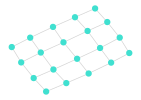

In [23]:
gplot(g, layout = g -> spring_layout(g; MAXITER=50)) # try different values for MAXITER

### Spectral layout

- Bases on eigenvalues/eigenvectors of matrices derrived from the graph

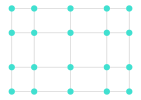

In [24]:
gplot(g, layout=spectral_layout)

### Warning!

Graph layouts are hard.

In [25]:
g = erdos_renyi(20, 0.5) # 20 nodes, each possible edge exists with 50% probability

{20, 86} undirected simple Int64 graph

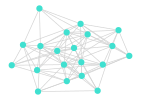

In [26]:
gplot(g)

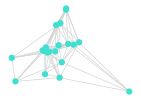

In [27]:
gplot(g, layout=spectral_layout)

### Exercise: plotting a wheel graph

- Create a wheel graph
- Plot with `spring_layout`
- Plot with `spectral_layout`
- Create your own layout that places the first vertex in the middle, everything else in a circle around it

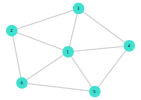

In [28]:
wheel = wheel_graph(6) # try 100 instead
gplot(wheel, nodelabel=vertices(wheel))

**Hint 1:** Vertex 1 is always in the middle

**Hint 2:** Scale does not matter -> `GraphPlot` scales to square

**Hint 3:**  The `k`-th point on a `n` point cycle lies at `(cos(2pi * k / n, sin(2pi * k / n)`

**Hint 4:** A layout is map from graph `g` to a tuple of vectors `[x_1, x_2, ..., x_n], y_1, y_2, ..., y_n]`

Solution below

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

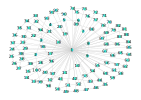

In [52]:
wheel = wheel_graph(100)

gplot(wheel, nodelabel=vertices(wheel), layout=spring_layout)

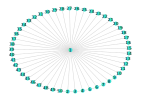

In [49]:
gplot(wheel, nodelabel=vertices(wheel), layout=spectral_layout)

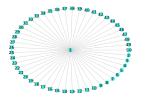

In [50]:
function wheel_layout(g)
    
    n = nv(g) - 1
    
    xs = [0.0; map(k -> cos(2pi * k / n), 1:n) ]
    ys = [0.0; map(k -> sin(2pi * k / n), 1:n) ]
    
    return xs, ys
end


gplot(wheel, nodelabel=vertices(wheel), layout = wheel_layout)

### Summary and outlook

- Seen how to plot graphs
- Seen how to set plot attributes
- Seen how different layout work


- `GraphPlot.jl` is not in the best shape - huge room for improvements
    - Need more layouts
    - Current layouts have some issues
- Other graph plotting package: https://github.com/JuliaPlots/GraphRecipes.jl
    - Might be a bit more polished
    - Might be a bit slow (but easy fixable)
- Consider also exporting the graph and then plotting using a specialized software such as https://graphviz.org/
- All in 